In [ ]:
pip install pandas pyarrow matplotlib scikit-learn torch torch-geometric pyarrow fastparquet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy.sparse import vstack
from tqdm import tqdm
import json
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score
import numpy as np

In [4]:
# Read the JSON dataset
reviews = pd.read_json("dataset/yelp_academic_dataset_review.json", lines=True)
users = pd.read_json("dataset/yelp_academic_dataset_user.json", lines=True)

# Save to parquet format
reviews.to_parquet("dataset/yelp_review_dataset.parquet")
users.to_parquet("dataset/yelp_user_dataset.parquet")


# Print all columns
# print(reviews.columns)
print(users.columns)
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [9]:
users

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
############# EXPLOTARORY ANALYSIS #################
reviews = reviews[:100000]
df = reviews[['business_id', 'user_id', 'text', 'stars']]

# Plot histogram of ratings
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

In [ ]:
############## IsFake PREDICTOR WITH PREPROCESSING ##############

Yelp_df = pd.read_parquet("dataset/yelp_dataset_ver1.parquet")
print(Yelp_df["Tokens"])

Yelp_df = Yelp_df[:100000]
for i, token in tqdm(enumerate(Yelp_df['Tokens']), total=100000):
    if len(token) > 512:
        Yelp_df['Tokens'][i] = token[:512]
    if len(token) < 512:
        token = token.ljust(512)
        Yelp_df['Tokens'][i] = token

# Define the chunk size
chunk_size = 1000
vectorizer = TfidfVectorizer()
Yelp_data = pd.DataFrame()
for i in tqdm(range(0, len(Yelp_df), chunk_size), total=len(Yelp_df)//chunk_size):
    chunk = Yelp_df['Tokens'][i:i+chunk_size]

    tfidf_matrix = vectorizer.fit_transform(chunk)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    Yelp_data = pd.concat([Yelp_data, tfidf_df], axis=0)
    
Yelp_data.reset_index(drop=True, inplace=True)

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(Yelp_data, Yelp_df['IsFake'], test_size=0.2, stratify=Yelp_df['IsFake'])

# 3. Train a Logistic Regression model as the baseline classifier
clf = LogisticRegression(max_iter=1000)  # Increasing max_iter for convergence
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# 4. Evaluate the classifier's performance
print(classification_report(y_test, y_pred))

In [7]:
print(Yelp_df.columns)

Index(['user_id', 'stars', 'useful_review', 'funny_review', 'cool_review',
       'text', 'review_count', 'useful_count', 'funny_count', 'cool_count',
       'friends', 'fans', 'average_stars', 'Year_review', 'Month_review',
       'Year_yelping_since', 'Month_yelping_since', 'IsFake', 'Tokens'],
      dtype='object')


In [ ]:
############## RATING PREDICTOR WITHOUT PREPROCESSING ##############
'''
Preprocessing tokens and just getting 512 chracter will lose a greate portion of information
'''

Yelp_df = pd.read_parquet('dataset/yelp_dataset_ver1.parquet')
end = len(Yelp_df)
Yelp_df = Yelp_df[:end]
print('data loaded')

# Create a new column 'IsFake' based on the 'stars' column
k = 4
Yelp_df['CustomIsFake'] = Yelp_df['stars'].apply(lambda x: True if x < k else False)
print('Created new column IsFake based on stars')

# 1. TF-IDF Vectorization in chunks
chunk_size = 5000  # Adjust this based on your memory capacity
vectorizer = TfidfVectorizer()
vectorizer.fit(Yelp_df['Tokens'])  # Fit the vectorizer on the entire 'Tokens' column
print('TF-IDF fir completed!')
tfidf_matrices = []

for start in tqdm(range(0, end, chunk_size)):
    end = start + chunk_size
    chunk = Yelp_df['Tokens'][start:end]
    tfidf_matrix_chunk = vectorizer.transform(chunk)  # Only transform here
    tfidf_matrices.append(tfidf_matrix_chunk)

tfidf_matrix = vstack(tfidf_matrices)
print('Vectorization completed in chunks!')

# 2. Split the dataset for binary fake, not_fake prediction
# X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, Yelp_df['CustomIsFake'], test_size=0.2, stratify=Yelp_df['CustomIsFake'])

# split data for stars variation prediction
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, Yelp_df['stars'], test_size=0.2, stratify=Yelp_df['stars'])


# 3. Train a Logistic Regression model as the baseline classifier
clf = LogisticRegression(max_iter=1000)  # Increasing max_iter for convergence
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# 4. Evaluate the classifier's performance
print(classification_report(y_test, y_pred))

In [ ]:
################ RATING PREDICTOR WITHOUT REVIEW TEXT EMBEDDING ################
'''
Step 1: Feature Construction
For each review, we'll extract:
User's features
Business's features
Features of businesses that the user has reviewed (excluding the current business)
Features of reviews that the business has received (excluding the current user)
Step 2: Model Training
I'll use a simple regression model, Linear Regression, to predict the star rating.
'''

reviews_df = pd.read_parquet("dataset/yelp_dataset_ver2.parquet")

print(reviews_df.columns)
X = reviews_df[['review_count', 'useful_count', 'funny_count', 'cool_count', 'average_stars', 
              'business_stars', 'business_review_count', 'is_open']]
y = reviews_df['stars']

X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rounded_preds = np.round(y_pred)
rounded_targets = np.round(y_test)
precision = precision_score(rounded_targets, rounded_preds, average='macro')
recall = recall_score(rounded_targets, rounded_preds, average='macro')
f1 = f1_score(rounded_targets, rounded_preds, average='macro')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


First we run baseline classifier with below condition:
- all reviews with rating = 1 as fake reviews and other reviews with rating >1 as not_fake reviews. The results are as follows:


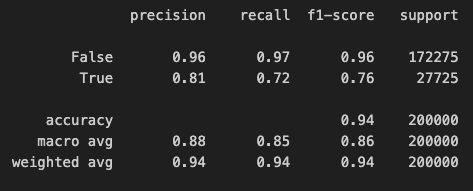

- Then we change the criteria of being fake review to rating <=3 instead of just rating =1 and not_fake reviews with rating >3 instead of rating >1. This condition gave us the following results:

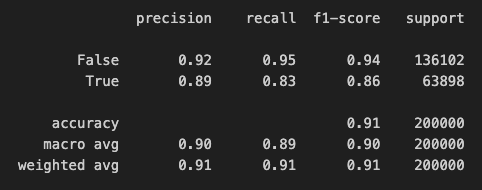

- As the next step, we considered the stars given to a review as a good mesure of it's probability to not being a fake review. So we simply considered a range of 1 being fully fake and 5 being fully not fake. We built a simple logistic regression model to predict the probability of a review being fake based on it's stars. The results of this model are:

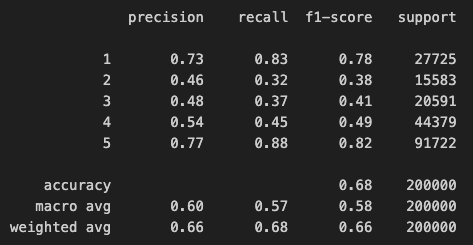

As we can see the baseline performs poorly for middle level ratings (between 2 and 4 inclusive). The previous observation made us to present a more sophisticated approach for automatic user embedding considering the temporal charactristic of yelp dataset. In yelp dataset we can see the friends of a given user who reviewed a business and the businesses reviewed by a given user. We can leverage this temporal information to build a better user embedding which can help improve the fake review detection performance for middle level ratings. To do so, forst we create a massive user-business bipartite graph based on the review data. Then we apply graph embedding techniques like node2vec to learn low dimensional embedding for each user which captures both the direct as well as 2nd order neighborhood information. The choice on how we build our graph:
- User-Business Bipartite Graph:
    - Nodes: Users and businesses.
    - Edges: An edge between a user and a business represents a review given by that user to that business.
    - Edge Features: Review text, review stars, useful_review, funny_review, cool_review.
    - Node Features for User: review_count, useful_count, funny_count, cool_count, friends, fans, average_stars, Year_yelping_since, Month_yelping_since.
    - Node Features for Business: This would need external data about the business, like its category, location, average rating, etc.
    - Advantages:
        - This structure is intuitive and directly mirrors the user-item interaction which is central to recommendation systems. It can leverage user-user and item-item similarity in advanced models.
    - Challenges:
        - Requires handling bipartite graphs in the graph neural network (GNN) model. Some GNNs are designed for homogenous graphs (nodes of only one type).
        - Embedding generation can be more complex due to two types of nodes.
- User-Review Graph:
    - Nodes: Users and reviews.
    - Edges: An edge between a user and a review represents that a user has written that review.
    - Node Features for User: review_count, useful_count, funny_count, cool_count, friends, fans, average_stars, Year_yelping_since, Month_yelping_since.
    - Node Features for Review: Text tokens, stars, useful_review, funny_review, cool_review, Year_review, Month_review.
    - Advantages:
        - All features are directly on the nodes, which might make the graph simpler to understand and process.
        - Homogeneous graph structure can be more straightforward to handle in certain GNN architectures.
    - Challenges:
        - The user-review connection might not capture all the intricate relationships that exist in the data, especially when considering relationships between different businesses or different users.

So we choosed the user-business graph structure for the following reasons:
- It directly represents the user-business interaction.
- Additional contextual information about businesses can be added easily.
- Businesses can have their intrinsic properties which influence ratings. For example, a user's rating might be influenced by the average rating of a business, its category, or other external factors. This structure allows for capturing such relationships.
- This structure can also incorporate collaborative filtering-like insights, where you consider the influence of similar users or items.

## Exploratory Analysis

On a dataset of 1M reviews we have:

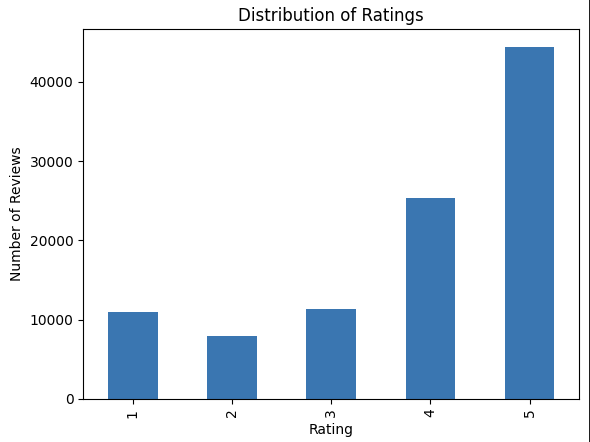

In [12]:
################## REVIEWS COMPREHENSIVE DATASET ####################
business_path = "dataset/yelp_dataset/yelp_academic_dataset_business.json"
reviews_path = "dataset/yelp_review_dataset.parquet"
users_path = "dataset/yelp_user_dataset.parquet"

with open(business_path, 'r') as f:
    business_data = [json.loads(line) for line in f]
business_df = pd.json_normalize(business_data)
print('businesses data loaded')

reviews_df = pd.read_parquet(reviews_path)
print('reviews data loaded')

users_df = pd.read_parquet(users_path)
print('users data loaded')

print('number of unique business', len(business_df))
print('number of unique reviews', len(reviews_df))
print('number of unique users', len(users_df))

# Define the columns you want to join
users_df = users_df.rename(columns={
    'useful': 'useful_count',
    'funny': 'funny_count',
    'cool': 'cool_count'
})

reviews_df = reviews_df.rename(columns={
    'useful': 'review_useful',
    'funny': 'review_funny',
    'cool': 'review_cool'
})

business_df = business_df.rename(columns={
    'stars': 'business_stars',
    'review_count': 'business_review_count'
})

columns_to_join = ['user_id', 'review_count', 'useful_count', 'funny_count', 'cool_count',
                   'friends', 'fans', 'average_stars',
                   'yelping_since']

# Join reviews_df with the selected columns from Yelp_df
merged_reviews_df = pd.merge(reviews_df, users_df[columns_to_join], on=['user_id'], how='left')

# First, create a concatenated 'address' column in business_df
business_df['full_address'] = business_df['address'].astype(str) + ", " + \
                             business_df['city'].astype(str) + ", " + \
                             business_df['state'].astype(str) + " " + \
                             business_df['postal_code'].astype(str)

# Optionally, save the business dataframe as parquet for future usage
business_df.to_parquet("dataset/yelp_businesses_dataset.parquet")
print('business df saved!')

# Adjust your selected columns list to use the new 'full_address' column
business_selected_columns = ['business_id', 'name', 'full_address', 'business_stars', 'business_review_count', 'is_open', 'categories']
final_df = pd.merge(merged_reviews_df, business_df[business_selected_columns], on=["business_id"], how="left")
print('business df joined')
# Save the comprehensive dataframe
final_df.to_parquet("dataset/yelp_dataset_ver2.parquet")
print(len(final_df))

businesses data loaded
reviews data loaded
users data loaded
number of unique business 150346
number of unique reviews 6990280
number of unique users 1987897
business df saved!
business df joined
6990280


In [2]:
############ CREATING GRAPH OF USER & REVIEWS ##########

final_df = pd.read_parquet("dataset/yelp_dataset_ver2.parquet")
print('reviews loaded')
final_df = final_df[:50000]
final_df.to_parquet("dataset/yelp_dataset_ver2_small.parquet")

reviews loaded


In [ ]:
####### using py2neo ########

import pandas as pd
from py2neo import Graph, Node, Relationship

# Establish a connection to the Neo4j database
graph = Graph("neo4j+s://c71979c8.databases.neo4j.io", auth=("neo4j", "cwQnjM83_rh4qgPddgUxSwLYJFDa8T6D2Q2IFp__gLs"))  # Replace 'your_password' with your Neo4j password

# Iterate over rows in the final_df DataFrame
for _, row in tqdm(final_df.iterrows(), total=len(final_df)):
    
    # Create or fetch user node
    user_node = Node("User", user_id=row['user_id'], review_count=row['review_count'], useful_count=row['useful_count'], 
                     funny_count=row['funny_count'], cool_count=row['cool_count'], friends=row['friends'], 
                     fans=row['fans'], average_stars=row['average_stars'], yelping_since=row['yelping_since'])
    graph.merge(user_node, "User", "user_id")
    
    # Create or fetch business node
    business_node = Node("Business", business_id=row['business_id'], business_stars=row['business_stars'], 
                         business_review_count=row['business_review_count'], is_open=row['is_open'], 
                         categories=row['categories'])
    graph.merge(business_node, "Business", "business_id")
    
    # Create review relationship between user and business
    rel = Relationship(user_node, "REVIEWED", business_node, stars=row['stars'], review_useful=row['review_useful'], 
                       review_funny=row['review_funny'], review_cool=row['review_cool'], text=row['text'])
    graph.create(rel)

# Create friendships relationships
for _, row in tqdm(final_df.iterrows(), total=len(final_df)):
    user = graph.nodes.match("User", user_id=row['user_id']).first()
    
    # Extract friends
    friends_list = row['friends'].split(',')
    
    for friend_id in friends_list:
        friend_node = graph.nodes.match("User", user_id=friend_id.strip()).first()  # Fetch the node for the friend
        
        # Check if the friend node exists in the database
        if friend_node:
            # Check if this relationship already exists to prevent duplicate relationships
            if not graph.match((user, friend_node), r_type="IS_FRIEND_OF"):
                rel = Relationship(user, "IS_FRIEND_OF", friend_node)
                graph.create(rel)

#  7%|▋         | 3474/50000 [9:21:25<125:19:02,  9.70s/it] 

Given the previous graph, a simple approach to use ML on graph would be:
- Feature Construction:
    
    For each review edge from a user to a business:
    User Node Features: Extract the features of the user node such as 'review_count', 'useful_count', etc.
    Business Node Features: Extract the features of the business node such as 'business_stars', 'is_open', etc.
    User's Neighbors' Features: Consider the businesses that the user has reviewed in the past (excluding the current business). Aggregate their features. For example, take the mean of the stars of the businesses that the user has reviewed.
    Business's Neighbors' Features: Consider the reviews that the business has received from other users (excluding the current user). Aggregate their features. For instance, calculate the mean of the 'stars' of reviews from other users.
    Concatenate all the extracted features to form a feature vector for the review edge.
- Model Training:
    
    Once you have constructed a feature matrix for all review edges, you can use traditional machine learning models like Linear Regression, Decision Trees, Random Forest, etc., to predict the 'stars' of a review.
    Use a regression model if you're predicting the actual star rating. If you're classifying whether a review is positive or negative, you can convert star ratings into binary classes (e.g., 4 & 5 stars as positive and 1, 2 & 3 as negative) and use a classification model.
- Evaluation:
    
    Split the dataset into training and testing subsets.
    Train the model on the training subset and validate it on the testing subset using appropriate regression metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), etc.

## Linear Regression without review text embedding
For the next step, after creating our user-business bipartite graph, we tried to have user and business features all together and then try to predict the rating of a given review without considering it's review text. This approach gave us the following results:

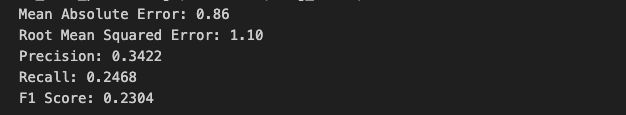

As we can see the result is worse than baseline of having text vectorization as embedding for reviews and stars as prediction directly.

Using GCN on our user-business bipartite graph we found the following results for 50k reviews dataset:

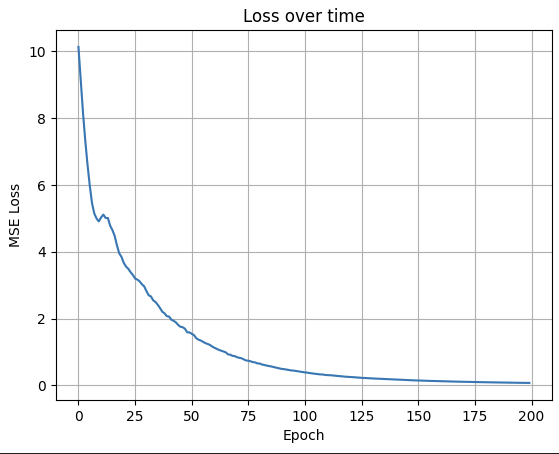

In this practice we just consider 4 main edge_features in our edge embedding as follows: review_stars, is_funny, is_cool, is_useful. The task was predicting the edge star based on our graph embedding. For node embeddings we just consider a node being user or business as a binary output (the simplest embedding).